In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

A CNN Custom model with dense layers

2025-08-22 11:24:58.417668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755861898.631093      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755861898.692742      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 13 classes: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'black_stem_borer', 'blast', 'brown_spot', 'downy_mildew', 'hispa', 'leaf_roller', 'normal', 'tungro', 'white_stem_borer', 'yellow_stem_borer']
Train: 3120 | Val: 1040 | Test: 1040


I0000 00:00:1755861916.790923      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755861916.791627      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,02

 Total params: 690,925 (2.64 MB)

 Trainable params: 688,173 (2.63 MB)

 Non-trainable params: 2,752 (10.75 KB)

Epoch 1/50


I0000 00:00:1755861926.089677      98 service.cc:148] XLA service 0x78bfe8002630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755861926.090447      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755861926.090478      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755861927.010633      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/98 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.1016 - loss: 2.9520  

I0000 00:00:1755861934.916157      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.1423 - loss: 2.7205
Epoch 1: val_loss improved from inf to 3.11322, saving model to best_paddy_cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.1427 - loss: 2.7189 - val_accuracy: 0.1087 - val_loss: 3.1132 - learning_rate: 0.0010
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.2373 - loss: 2.3241
Epoch 2: val_loss improved from 3.11322 to 2.87400, saving model to best_paddy_cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.2374 - loss: 2.3234 - val_accuracy: 0.1048 - val_loss: 2.8740 - learning_rate: 0.0010
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.2885 - loss: 2.0994
Epoch 3: val_loss improved from 2.87400 to 2.73351, saving model to best_paddy_cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 0.2885 - loss: 2.0993 - val_accuracy: 0.1538 - val_loss: 2.7335 - learning_rate: 0.0010
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 

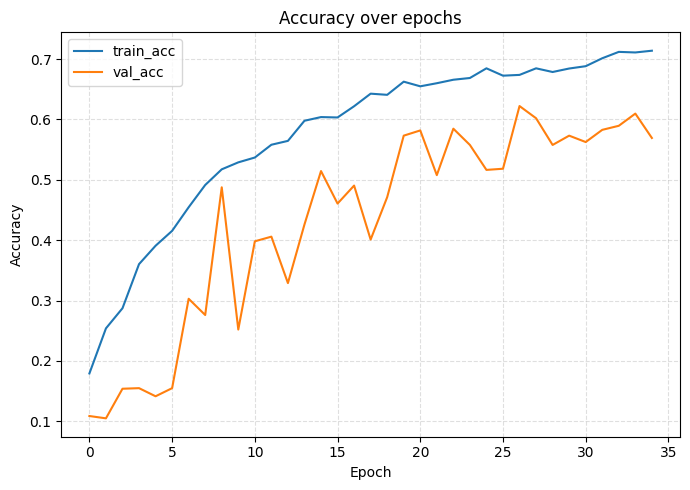

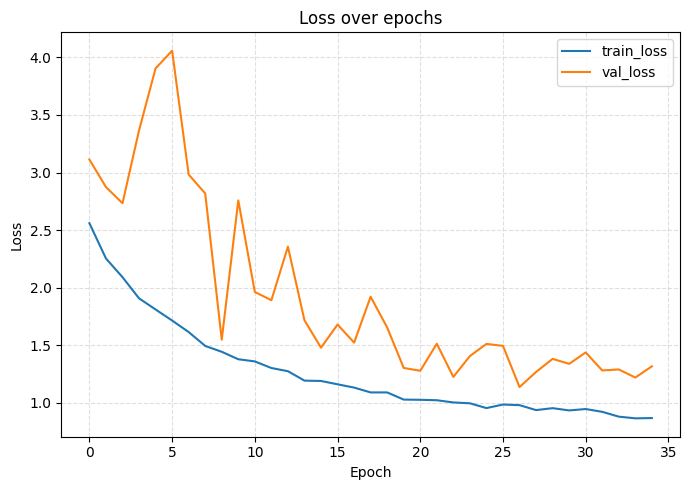

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step

CLASSIFICATION REPORT (Test):
                          precision    recall  f1-score   support

   bacterial_leaf_blight     0.0667    0.0875    0.0757        80
   bacterial_leaf_streak     0.0672    0.1000    0.0804        80
bacterial_panicle_blight     0.0649    0.0625    0.0637        80
        black_stem_borer     0.1067    0.1000    0.1032        80
                   blast     0.1081    0.0500    0.0684        80
              brown_spot     0.1500    0.0375    0.0600        80
            downy_mildew     0.0938    0.0750    0.0833        80
                   hispa     0.0000    0.0000    0.0000        80
             leaf_roller     0.1329    0.2625    0.1765        80
                  normal     0.0796    0.1125    0.0933        80
                  tungro     0.0714    0.0750    0.0732        80
        white_stem_borer     0.1667    0.1375    0.1507        80
       yellow_stem_borer     0.0800    0.0750    0.0774        80

   

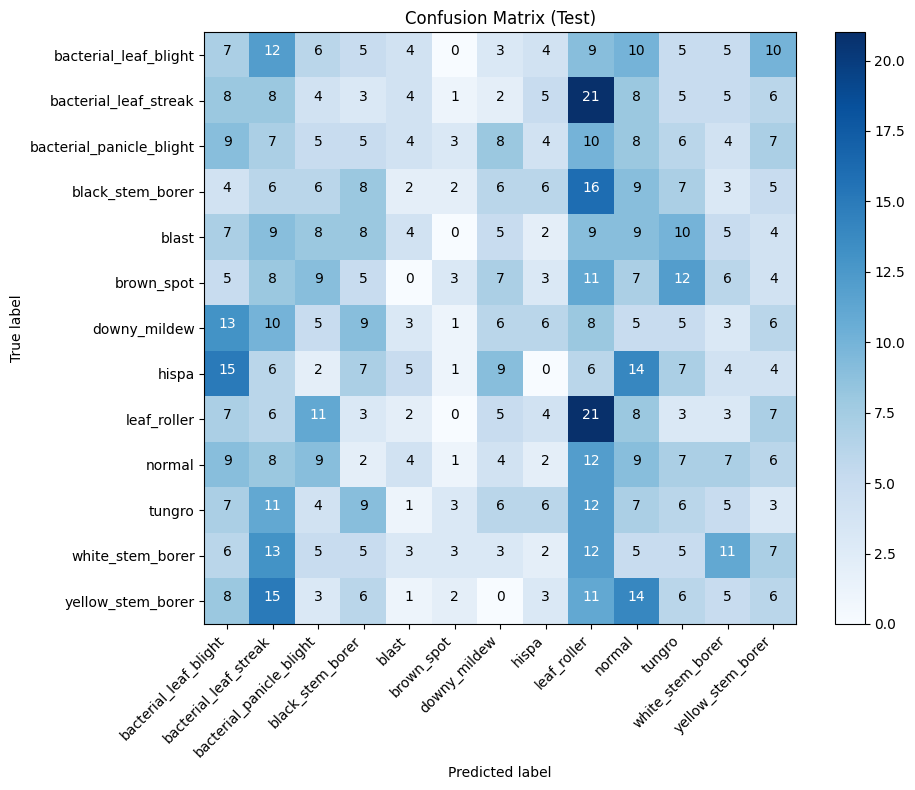

In [1]:
"""
Paddy Doctor CNN training script (with multiple Dense layers)
- Builds a CNN with He initialization, BatchNorm, Dropout
- Dense layers: 512 → 256 → 128 → softmax output
- Uses EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
- 60/20/20 stratified split of dataset
- Prints accuracy/loss plots, classification report, and confusion matrix
"""

import os
import glob
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# =========================
# CONFIG
# =========================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

ROOT_DIR = "/kaggle/input/paddy-leaf-small/Small-80"   # folder that contains the 'train' and 'test'
TRAIN_DIR = os.path.join(ROOT_DIR, "train")
TEST_DIR  = os.path.join(ROOT_DIR, "test")

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50  # minimum epochs

# =========================
# UTILITIES
# =========================

def list_images_by_class(train_dir, test_dir):
    class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

    filepaths, labels = [], []
    for idx, cname in enumerate(class_names):
        train_glob = glob.glob(os.path.join(train_dir, cname, "**", "*"), recursive=True)
        test_glob  = glob.glob(os.path.join(test_dir,  cname, "**", "*"), recursive=True)
        all_files = [p for p in train_glob + test_glob if p.lower().endswith((".jpg",".jpeg",".png",".bmp",".gif"))]
        all_files.sort()
        filepaths.extend(all_files)
        labels.extend([idx] * len(all_files))
    return class_names, np.array(filepaths), np.array(labels)


def build_datasets(img_size=224, batch_size=32):
    AUTOTUNE = tf.data.AUTOTUNE
    def decode_img(path):
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.image.resize(img, [img_size, img_size])
        img = tf.cast(img, tf.float32) / 255.0
        return img

    def make_ds(paths, labels, augment=False):
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))
        ds = ds.shuffle(len(paths), seed=SEED, reshuffle_each_iteration=True)
        def _load(path, label):
            img = decode_img(path)
            return img, label
        ds = ds.map(_load, num_parallel_calls=AUTOTUNE)
        if augment:
            aug = tf.keras.Sequential([
                layers.RandomFlip("horizontal"),
                layers.RandomRotation(0.05),
                layers.RandomZoom(0.1),
                layers.RandomTranslation(0.05, 0.05)
            ])
            ds = ds.map(lambda x, y: (aug(x, training=True), y), num_parallel_calls=AUTOTUNE)
        ds = ds.batch(batch_size).prefetch(AUTOTUNE)
        return ds
    return make_ds


def create_stratified_splits(paths, labels, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    sss1 = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=SEED)
    (train_val_idx, test_idx), = sss1.split(paths, labels)
    X_train_val, X_test = paths[train_val_idx], paths[test_idx]
    y_train_val, y_test = labels[train_val_idx], labels[test_idx]

    val_portion = val_ratio / (train_ratio + val_ratio)
    sss2 = StratifiedShuffleSplit(n_splits=1, test_size=val_portion, random_state=SEED)
    (train_idx, val_idx), = sss2.split(X_train_val, y_train_val)
    X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
    y_train, y_val = y_train_val[train_idx], y_train_val[val_idx]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# =========================
# MODEL
# =========================

def build_cnn(input_shape, num_classes):
    init = tf.keras.initializers.HeNormal(seed=SEED)
    model = models.Sequential([
        layers.Conv2D(32, 3, padding='same', kernel_initializer=init, use_bias=False, input_shape=input_shape),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding='same', kernel_initializer=init, use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, 3, padding='same', kernel_initializer=init, use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(256, 3, padding='same', kernel_initializer=init, use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.GlobalAveragePooling2D(),

        # Dense layers stack
        layers.Dense(512, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.2),

        layers.Dense(num_classes, activation='softmax', kernel_initializer=init)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# =========================
# CONFUSION MATRIX PLOTTER
# =========================

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN
# =========================

def main():
    class_names, all_paths, all_labels = list_images_by_class(TRAIN_DIR, TEST_DIR)
    num_classes = len(class_names)
    print(f"Found {num_classes} classes: {class_names}")

    (X_train, y_train), (X_val, y_val), (X_test, y_test) = create_stratified_splits(all_paths, all_labels)
    print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

    make_ds = build_datasets(img_size=IMG_SIZE, batch_size=BATCH_SIZE)
    train_ds = make_ds(X_train, y_train, augment=True)
    val_ds   = make_ds(X_val, y_val, augment=False)
    test_ds  = make_ds(X_test, y_test, augment=False)

    model = build_cnn((IMG_SIZE, IMG_SIZE, 3), num_classes)
    model.summary()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1),
        ModelCheckpoint('best_paddy_cnn.keras', monitor='val_loss', save_best_only=True, verbose=1)
    ]

    history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=callbacks, verbose=1)

    plt.figure(figsize=(7,5))
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7,5))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    y_prob = model.predict(test_ds, verbose=1)
    y_pred = np.argmax(y_prob, axis=1)

    print("\nCLASSIFICATION REPORT (Test):")
    print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix (Test)')

if __name__ == "__main__":
    main()


2025-08-24 14:25:00.484463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756045500.666243      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756045500.734982      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Images in train dir: 4160
Images in test dir : 1040
Total images       : 5200
Validation fraction (of TRAIN_DIR) set to: 0.250
Found 4160 files belonging to 13 classes.
Using 3120 files for training.


I0000 00:00:1756045528.990542      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756045528.991291      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 4160 files belonging to 13 classes.
Using 1040 files for validation.
Detected classes (13): ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'black_stem_borer', 'blast', 'brown_spot', 'downy_mildew', 'hispa', 'leaf_roller', 'normal', 'tungro', 'white_stem_borer', 'yellow_stem_borer']
Found 1040 files belonging to 13 classes.


Model: "CustomCNN_3Dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 691,405 (2.64 MB)

 Trainable params: 688,653 (2.63 MB)

 Non-trainable params: 2,752 (10.75 KB)

Epoch 1/50


I0000 00:00:1756045543.233139     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1353 - loss: 2.7345
Epoch 1: val_loss improved from inf to 2.87657, saving model to best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - accuracy: 0.1357 - loss: 2.7325 - val_accuracy: 0.0817 - val_loss: 2.8766 - learning_rate: 0.0010
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2285 - loss: 2.2979
Epoch 2: val_loss did not improve from 2.87657
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.2287 - loss: 2.2972 - val_accuracy: 0.0837 - val_loss: 3.5114 - learning_rate: 0.0010
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2902 - loss: 2.1095
Epoch 3: val_loss improved from 2.87657 to 2.84234, saving model to best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.2904 - loss: 2.1090 - val_accuracy: 0.1125 - val_loss: 2.8423 - learning_rate: 0.0010
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3115 - loss: 2.0050
Epoch 4: val_loss improved f

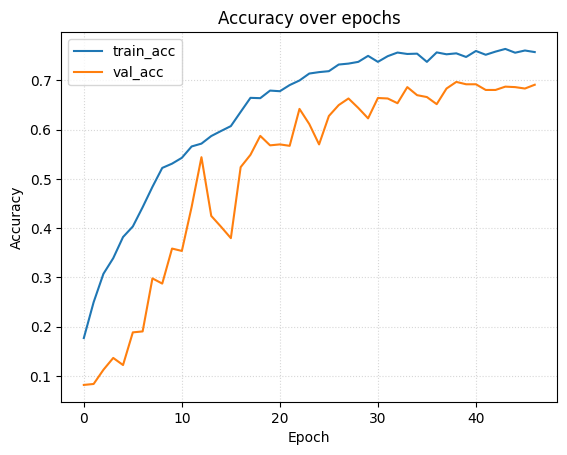

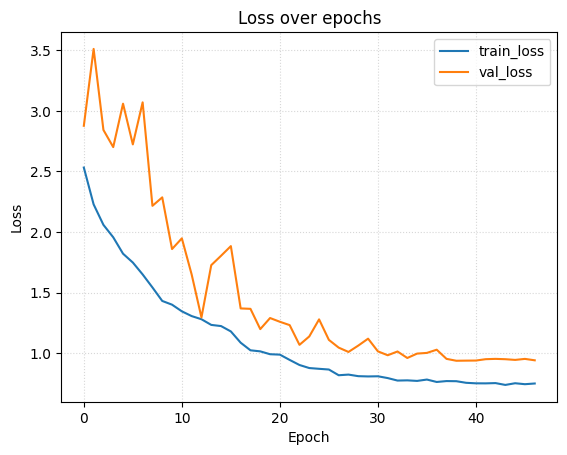


=== Test Evaluation ===
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7188 - loss: 0.9030
Test Loss: 0.8940 | Test Accuracy: 0.7202
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step

=== Classification Report ===
                          precision    recall  f1-score   support

   bacterial_leaf_blight     0.6575    0.6000    0.6275        80
   bacterial_leaf_streak     0.6827    0.8875    0.7717        80
bacterial_panicle_blight     0.9846    0.8000    0.8828        80
        black_stem_borer     0.9367    0.9250    0.9308        80
                   blast     0.8302    0.5500    0.6617        80
              brown_spot     0.6786    0.4750    0.5588        80
            downy_mildew     0.7143    0.8125    0.7602        80
                   hispa     0.5882    0.5000    0.5405        80
             leaf_roller     0.6593    0.7500    0.7018        80
                  normal     0.5299    0.8875    0.6636        80
                  tungro     0.7286    0.6375    0.6800      

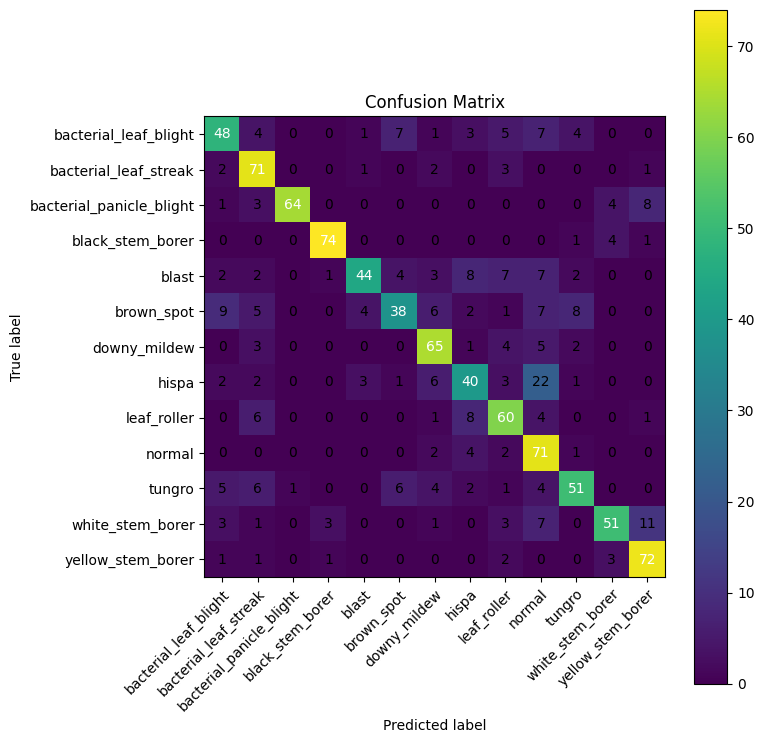

In [1]:
# =============================================
# CNN pipeline for image dataset with train/val/test
# - Supports existing folder structure: root/train, root/test
# - Dynamically approximates a 60:20:20 overall split using your existing test folder
# - Data augmentation, EarlyStopping, LR scheduler, Checkpointing
# - Accuracy & loss curves
# - Full test evaluation: classification report + confusion matrix
# - Minimum of 3 Dense layers (here: 3 hidden Dense layers)
# - Prints model summary (parameter counts)
# =============================================

import os
import math
from pathlib import Path

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ---------------------------
# 1) Configuration
# ---------------------------
# >>> Set these to your dataset root that contains 'train' and 'test' folders
DATA_ROOT = "/kaggle/input/paddy-leaf-small/Small-80"  # e.g., "/kaggle/input/paddy-doctor-diseases-small"
TRAIN_DIR = os.path.join(DATA_ROOT, "train")
TEST_DIR  = os.path.join(DATA_ROOT, "test")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 1337
EPOCHS = 50
LEARNING_RATE = 1e-3

# ---------------------------
# 2) Utility: Count images and compute validation split to approach 60/20/20
# ---------------------------

def count_images_in_dir(root_dir: str):
    exts = ("*.jpg", "*.jpeg", "*.png", "*.bmp", "*.gif")
    root = Path(root_dir)
    return sum(len(list(root.rglob(e))) for e in exts)

num_train_dir = count_images_in_dir(TRAIN_DIR)
num_test_dir  = count_images_in_dir(TEST_DIR)

if num_train_dir == 0:
    raise RuntimeError(f"No images found under: {TRAIN_DIR}. Check your path.")
if num_test_dir == 0:
    print("[Warn] No images found in test folder. The script will create a validation split only from train.")

total_images = num_train_dir + num_test_dir

# Desired overall ratios: 0.6 train, 0.2 val, 0.2 test
# We already have a test folder; its portion is num_test_dir / total_images.
# To approximate 60/20/20 overall, choose validation_split relative to TRAIN_DIR:
# val_fraction_in_train = desired_val_overall / (portion of data that will be drawn from TRAIN_DIR)
# Since TRAIN_DIR will be split into train & val, we use:
# desired_val_overall = 0.2 * total_images
# val_fraction = desired_val_overall / num_train_dir
if num_train_dir > 0:
    desired_val_overall = 0.2 * total_images
    val_fraction = max(0.01, min(0.49, desired_val_overall / max(1, num_train_dir)))
else:
    val_fraction = 0.2  # fallback

print(f"Images in train dir: {num_train_dir}")
print(f"Images in test dir : {num_test_dir}")
print(f"Total images       : {total_images}")
print(f"Validation fraction (of TRAIN_DIR) set to: {val_fraction:.3f}")

# ---------------------------
# 3) Build datasets (RGB)
# ---------------------------

autotune = tf.data.AUTOTUNE

# Build train/val from TRAIN_DIR using Keras split API
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=val_fraction,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=val_fraction,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Detected classes ({num_classes}): {class_names}")

# Test dataset from TEST_DIR (no shuffling)
if num_test_dir > 0:
    test_ds = tf.keras.utils.image_dataset_from_directory(
        TEST_DIR,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False,
    )
else:
    test_ds = None

# Cache & prefetch for performance
train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds   = val_ds.cache().prefetch(buffer_size=autotune)
if test_ds is not None:
    test_ds = test_ds.cache().prefetch(buffer_size=autotune)

# ---------------------------
# 4) Data augmentation + preprocessing
# ---------------------------

augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")

preprocess = layers.Rescaling(1./255)

# ---------------------------
# 5) CNN architecture (with >= 3 Dense layers)
# ---------------------------

def make_model(input_shape=(224, 224, 3), num_classes=10, lr=1e-3):
    inputs = layers.Input(shape=input_shape)

    x = augment(inputs)
    x = preprocess(x)

    # Conv block 1
    x = layers.Conv2D(32, 3, padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D()(x)

    # Conv block 2
    x = layers.Conv2D(64, 3, padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D()(x)

    # Conv block 3
    x = layers.Conv2D(128, 3, padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D()(x)

    # Conv block 4 (slightly deeper)
    x = layers.Conv2D(256, 3, padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)

    # Dense head (>= 3 Dense layers)
    x = layers.Dense(512, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(256, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs, name="CustomCNN_3Dense")
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

model = make_model(input_shape=IMG_SIZE + (3,), num_classes=num_classes, lr=LEARNING_RATE)

# Print model summary (includes parameter counts)
model.summary()

# ---------------------------
# 6) Callbacks
# ---------------------------

ckpt_path = "best_model.keras"
callbacks = [
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    ModelCheckpoint(ckpt_path, monitor="val_loss", save_best_only=True, verbose=1),
]

# ---------------------------
# 7) Train
# ---------------------------

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

# ---------------------------
# 8) Plot accuracy & loss curves
# ---------------------------

def plot_curves(hist):
    acc = hist.history.get("accuracy", [])
    val_acc = hist.history.get("val_accuracy", [])
    loss = hist.history.get("loss", [])
    val_loss = hist.history.get("val_loss", [])

    # Accuracy
    plt.figure()
    plt.plot(acc, label="train_acc")
    plt.plot(val_acc, label="val_acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over epochs")
    plt.legend()
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.show()

    # Loss
    plt.figure()
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss over epochs")
    plt.legend()
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.show()

plot_curves(history)

# ---------------------------
# 9) Evaluate on test set + classification report + confusion matrix
# ---------------------------

if test_ds is not None:
    print("\n=== Test Evaluation ===")
    test_loss, test_acc = model.evaluate(test_ds, verbose=1)
    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

    # Gather predictions
    y_true = []
    for _, labels in test_ds.unbatch():
        y_true.append(labels.numpy())
    y_true = np.array(y_true)

    y_prob = model.predict(test_ds, verbose=1)
    y_pred = np.argmax(y_prob, axis=1)

    print("\n=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion matrix (raw counts):\n", cm)

    # Plot confusion matrix
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           ylabel='True label', xlabel='Predicted label',
           title='Confusion Matrix')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Annotate counts
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
else:
    print("[Info] No test set found. Skipping test evaluation.")

# ---------------------------
# 10) (Optional) Save the final model
# ---------------------------
model.save("final_model.keras")
